<a href="https://colab.research.google.com/github/Ssujana2905/Ssujana2905/blob/main/Copy_of_STOCKMARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
start='2010-01-01'
end='2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1262318400&period2=1577851199&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'>\n<script>\nif(window != window.top){\ndocument.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'\n    + new Date().getTime() + \'&_R=\'\n    + encodeURIComponent(document.referrer)\n    + \'&err=404\'\n    + \'" width="0px" height="0px"/>\');\n}else{\nwindow.location.replace(\'https://\' + window.location.host + \'/?err=404\');\n}\n</script>\n<noscript>\n<META http-equiv="refresh" content="0;URL=https://finance.yahoo.com/?err=404">\n</noscript></html>'

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


/tmp/ipython-input-4-3152317698.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431895  6.446621  6.382907  6.414463  493729600
2010-01-05  6.443018  6.479384  6.409056  6.449630  601904800
2010-01-06  6.340532  6.468563  6.333920  6.443017  552160000
2010-01-07  6.328808  6.371486  6.282826  6.363972  477131200
2010-01-08  6.370887  6.371488  6.283129  6.320396  447610800


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.667595,68.728042,67.789906,67.828593,98572000
2019-12-24,68.732910,68.882825,68.406503,68.834464,48478800
2019-12-26,70.096558,70.113484,68.836848,68.865861,93121200
2019-12-27,70.069977,71.078233,69.663776,70.389138,146266000
2019-12-30,70.485855,70.768750,68.962598,69.987774,144114400


In [ ]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
1,2010-01-05,6.443018,6.479384,6.409056,6.449630,601904800
2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,2010-01-07,6.328808,6.371486,6.282826,6.363972,477131200
4,2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800


In [ ]:
df=df.drop(['Date'],axis=1)
df.head()

/tmp/ipython-input-7-3471825329.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443018,6.479384,6.409056,6.449630,601904800
2,6.340532,6.468563,6.333920,6.443017,552160000
3,6.328808,6.371486,6.282826,6.363972,477131200
4,6.370887,6.371488,6.283129,6.320396,447610800


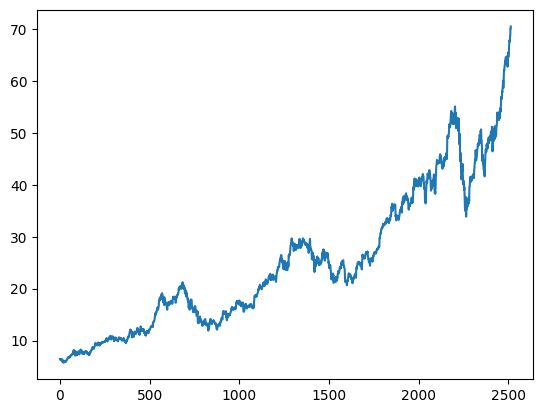

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.137911
2511,57.335284
2512,57.571941
2513,57.799543


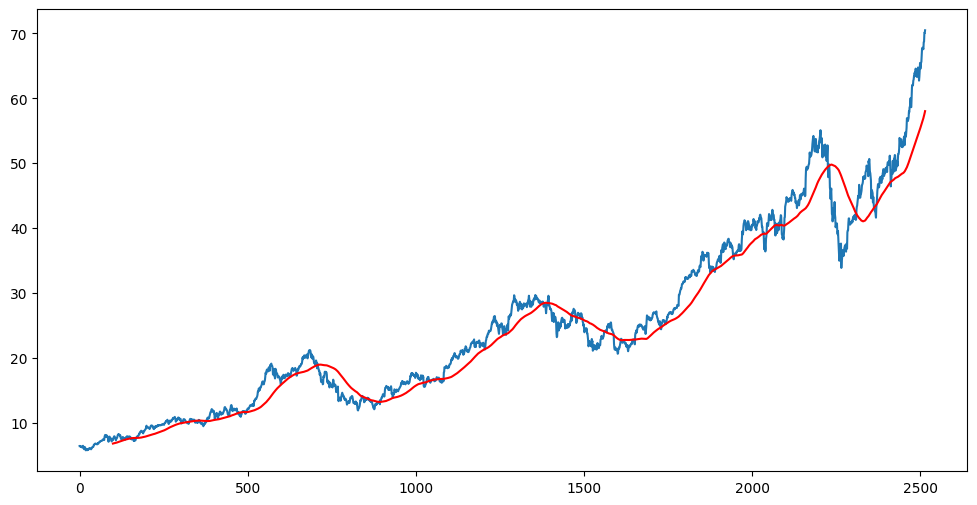

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.096149
2511,52.223418
2512,52.356549
2513,52.487130


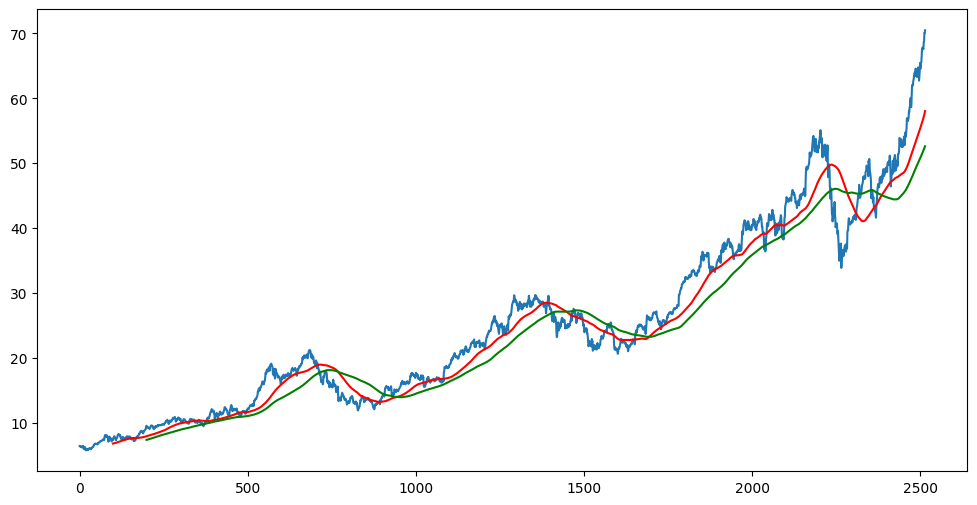

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2515, 5)

In [ ]:
#training testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [ ]:
data_training.head()

Ticker,AAPL
0,6.431895
1,6.443018
2,6.340532
3,6.328808
4,6.370887


In [ ]:
data_testing.head()

Ticker,AAPL
1760,26.961212
1761,26.751022
1762,26.827246
1763,26.797218
1764,26.933493


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02759986],
       [0.02806502],
       [0.02377918],
       ...,
       [0.88408375],
       [0.89123164],
       [0.88640191]])

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,ytrain=np.array(x_train),np.array(y_train)

In [ ]:
from keras.layers import Dense,Dropout,LSTM,Input
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True)) #100 is present at 1 and only close column so another 1
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True)) #100 is present at 1 and only close column so another 1
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu',return_sequences=False)) #100 is present at 1 and only close column so another 1
model.add(Dropout(0.5))

model.add(Dense(units=1))








In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Ensure x_train has shape (samples, time_steps, features)
x_train = np.array(x_train)
y_train = np.array(y_train)

# If x_train is 2D, reshape it to 3D
if len(x_train.shape) == 2:
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Make sure y_train is the same number of samples as x_train
print(x_train.shape)  # e.g., (1000, 60, 1)
print(y_train.shape)  # should be (1000,) or (1000, 1)


(1660, 100, 1)
(1660,)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - loss: 0.1269
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0135
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - loss: 0.0124
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 0.0097
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - loss: 0.0110
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0094
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0082
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 0.0092
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - loss: 0.0062
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0082
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - loss: 0.0078
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0059
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 0.0065
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
import pandas as pd
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)


In [ ]:
final_df.head()

Ticker,AAPL
0,24.902441
1,25.003553
2,24.817417
3,24.801332
4,24.858782


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02573569],
       [0.02789679],
       [0.02391846],
       [0.02357467],
       [0.02480255],
       [0.03118727],
       [0.0306962 ],
       [0.02991035],
       [0.02922287],
       [0.03059799],
       [0.02642325],
       [0.02809308],
       [0.0240657 ],
       [0.0218066 ],
       [0.01871245],
       [0.01812305],
       [0.01409564],
       [0.01458675],
       [0.01768094],
       [0.02259241],
       [0.022445  ],
       [0.02568665],
       [0.01173825],
       [0.        ],
       [0.01134535],
       [0.02367284],
       [0.04243433],
       [0.06109742],
       [0.05790506],
       [0.05132381],
       [0.05127472],
       [0.05117656],
       [0.05643181],
       [0.04705106],
       [0.04788595],
       [0.04891734],
       [0.05314104],
       [0.04444802],
       [0.04872089],
       [0.04611784],
       [0.04847539],
       [0.04872089],
       [0.05284638],
       [0.05368127],
       [0.06345505],
       [0.06468284],
       [0.0697906 ],
       [0.068

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#predictions
y_predicted=model.predict(x_test)
y_predicted.shape


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step


(755, 1)

In [ ]:
scaler.scale_

array([0.02137322])

In [ ]:
scale_factor=1/0.02137322
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

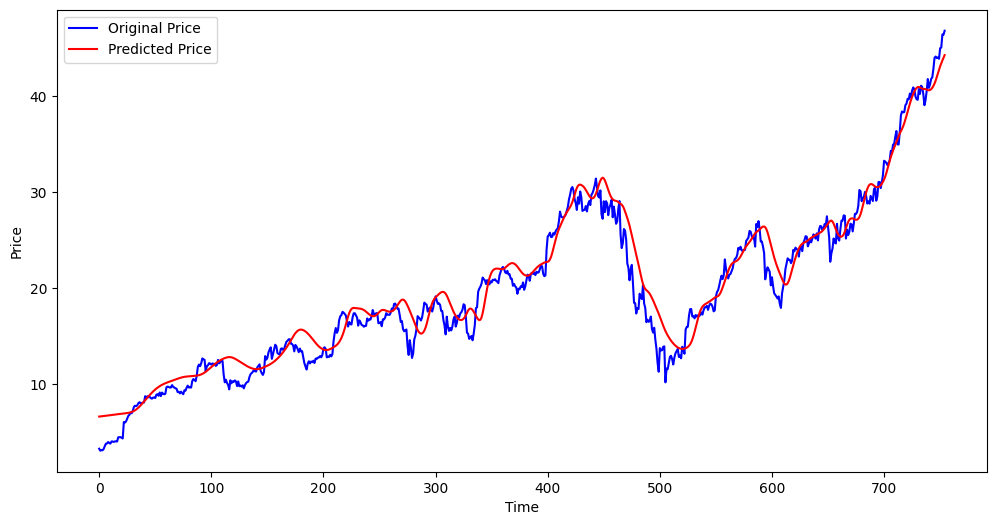

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

(755,)
(755, 1)
